# Importing the required Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sn 
import tensorflow as tf
import cv

# Fetching Data

## Labelling using ImageDataGenerator()

##### 6 classes - 20 images each for training 
#####             5 images each for cross-val

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# TRAINING_DATA
#### baggage_carriers - 96 images
#### birds - 95 images
#### hangar - 117 images
#### plane - 87 images
#### tow_tractor - 126 images 

In [3]:
#train_dir 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(
                'C:/Users/Prajval P/LTPL-PRJ-045/training_dir/',
                target_size = (224, 224),
                batch_size = 25,
                class_mode = 'sparse')

Found 518 images belonging to 5 classes.


# VALIDATION_DATA
#### baggage_carriers - 5 images
#### birds - 5 images
#### hangar - 5 images
#### plane - 5 images
#### tow_tractor - 5 images 

In [4]:
#validation_dir
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')
validation_generator = validation_datagen.flow_from_directory(
                'C:/Users/Prajval P/LTPL-PRJ-045/validation_dir',
                target_size = (224, 224),
                batch_size = 2,
                class_mode = 'sparse')

Found 25 images belonging to 5 classes.


# Designing the model 

### Model - VGG - 16

In [5]:
model = tf.keras.models.Sequential([
    # First Convolution - 2 layers 64 - filters
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (224, 224, 3), strides = (1, 1)), #Layer 1
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', strides = (1, 1)), #Layer 2
    # First Pooling layer: pool size 2x2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),#Layer 3 
    # Second Convolution - 2 layers 128 - filters 
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 4
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 5
    # Second Pooling layer: pool size 2x2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),#Layer 6
    # Third Convolution - 2 layers 256 - filters 
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 6
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 7
    # Third Pooling layer: pool size 2x2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),#Layer 8
    # Fourth Convolution - 3 layers 512 - filters
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 8
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 9
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 10
    # Fourth Pooling layer: pool size 2x2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),#Layer 11
    #Fifth Convolution - 3 layers 512 - filters
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 12
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 13
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', strides = (1, 1)),#Layer 14
    #Fifth Pooling layer: pool size 2x2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),#Layer 15
    # Dense Layers: 2 layers with 4096 hidden units
    tf.keras.layers.Dense(4096, activation = 'relu'),#Layer 16
    tf.keras.layers.Dense(4096, activation = 'relu'),#Layer 17
    # Dense Layer with sofmax activation for the final classification 
    tf.keras.layers.Dense(6, activation = 'softmax')#Layer 18
])

In [6]:
from tensorflow.keras.optimizers import RMSprop

In [7]:
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [8]:
history = model.fit(train_generator,
                              steps_per_epoch=15,  
                              epochs = 50,
                              validation_data = validation_generator,
                              validation_steps = 15,
                              verbose = 2)

Epoch 1/50
15/15 - 156s - loss: 12.5411 - acc: 0.1707 - val_loss: 12.7833 - val_acc: 0.2105
Epoch 2/50
15/15 - 164s - loss: 13.0084 - acc: 0.1956 - val_loss: 13.8949 - val_acc: 0.1404
Epoch 3/50
15/15 - 164s - loss: 13.3587 - acc: 0.1689 - val_loss: 11.6717 - val_acc: 0.2807
Epoch 4/50
15/15 - 175s - loss: 13.3673 - acc: 0.1707 - val_loss: 13.8949 - val_acc: 0.1404
Epoch 5/50
15/15 - 168s - loss: 13.1398 - acc: 0.1835 - val_loss: 13.2399 - val_acc: 0.1852
Epoch 6/50
15/15 - 170s - loss: 13.6215 - acc: 0.1547 - val_loss: 12.7833 - val_acc: 0.2105
Epoch 7/50
15/15 - 176s - loss: 12.8770 - acc: 0.1985 - val_loss: 12.7833 - val_acc: 0.1930
Epoch 8/50
15/15 - 169s - loss: 13.1094 - acc: 0.1867 - val_loss: 12.7833 - val_acc: 0.2105
Epoch 9/50
15/15 - 172s - loss: 13.5339 - acc: 0.1595 - val_loss: 12.6642 - val_acc: 0.2222
Epoch 10/50
15/15 - 175s - loss: 12.8332 - acc: 0.2028 - val_loss: 12.7833 - val_acc: 0.2105
Epoch 11/50
15/15 - 175s - loss: 13.6681 - acc: 0.1520 - val_loss: 12.7833 - va

# PLOTTING LOSS AND ACCURACY

Text(0.5, 1.0, 'Training and validation loss')

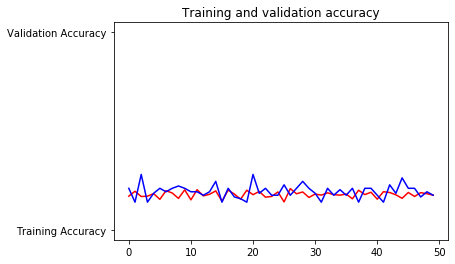

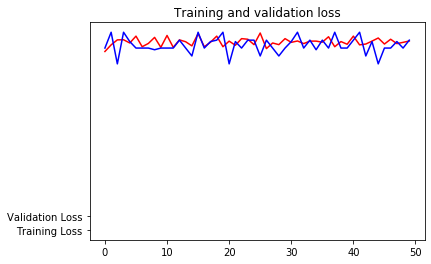

In [9]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


# Retrieve a list of list results on training and test data
# sets for each training epoch

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
